In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')

plt.rc('axes', titlesize='small')     # fontsize of the axes title
plt.rc('axes', labelsize='small')    # fontsize of the x and y labels
plt.rc('legend', fontsize='small')    # legend fontsize

In [2]:
with open("code/scripts/optimization_plots_same_resolution_40.pkl", "rb") as file:
    data40 = pickle.load(file)
with open("code/scripts/optimization_plots_same_resolution_80.pkl", "rb") as file:
    data80 = pickle.load(file)
with open("code/scripts/optimization_plots_same_resolution_160.pkl", "rb") as file:
    data160 = pickle.load(file)

In [3]:
p1_40 = [d[0][0] for d in data40[0][1:14]]
p2_40 = [d[0][1] for d in data40[0][1:14]]
p3_40 = [d[0][2] for d in data40[0][1:14]]
p4_40 = [d[0][3] for d in data40[0][1:14]]

p1_80 = [d[0][0] for d in data80[0][1:14]]
p2_80 = [d[0][1] for d in data80[0][1:14]]
p3_80 = [d[0][2] for d in data80[0][1:14]]
p4_80 = [d[0][3] for d in data80[0][1:14]]

p1_160 = [d[0][0] for d in data160[0][1:14]]
p2_160 = [d[0][1] for d in data160[0][1:14]]
p3_160 = [d[0][2] for d in data160[0][1:14]]
p4_160 = [d[0][3] for d in data160[0][1:14]]

In [4]:
true_parameters = np.array(
    [
        [0.78, 0.72, 0.71, 0.65, 0.2 , 0.09, 0.97, 0.17, 0.62, 0.85],
        [0.03, 0.16, 0.78, 0.28, 0.23, 0.45, 0.09, 0.06, 0.97, 0.67],
        [0.6 , 0.49, 0.09, 0.48, 0.07, 0.27, 0.76, 0.95, 0.03, 0.09],
        [0.96, 0.64, 0.4 , 0.26, 0.8 , 0.93, 0.19, 0.9 , 0.87, 0.08],
        [0.16, 0.9 , 0.5 , 0.83, 0.62, 0.41, 0.19, 0.32, 0.61, 0.36],
        [0.62, 0.75, 0.47, 0.61, 0.68, 0.65, 0.98, 0.35, 0.14, 0.94],
        [0.72, 0.78, 0.96, 0.44, 0.03, 0.66, 0.16, 0.56, 0.72, 0.21],
        [0.  , 0.38, 0.86, 0.55, 0.21, 0.66, 0.49, 0.44, 0.66, 0.11],
        [0.81, 0.19, 0.58, 0.8 , 0.63, 0.77, 0.82, 0.32, 0.97, 0.64],
        [0.48, 0.05, 0.16, 0.56, 0.49, 0.46, 0.58, 0.04, 0.84, 1.  ]
    ]
).reshape((10, 10, 1))
variable_parameters = [(4, -1, 0), (5, -1, 0), (4, -2, 0), (5, -2, 0)]

obj40 = [np.linalg.norm(obj[1], 2) for obj in data40[0][1:14]]
obj80 = [np.sum(np.power(obj[1], 2)) for obj in data80[0][1:14]]
obj160 = [np.sum(np.power(obj[1], 2)) for obj in data160[0][1:14]]

[true_parameters[variable_parameters[i]] for i in range(4)]

[0.36, 0.94, 0.61, 0.14]

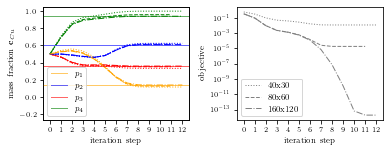

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(5.3, 2), constrained_layout=True)
ax[0].plot(p1_40, color="red", linestyle="dotted", linewidth=1)
ax[0].plot(p2_40, color="green", linestyle="dotted", linewidth=1)
ax[0].plot(p3_40, color="blue", linestyle="dotted", linewidth=1)
ax[0].plot(p4_40, color="orange", linestyle="dotted", linewidth=1)

ax[0].plot([0], color="gray", linestyle="dotted", linewidth=1, label="40x30")

ax[0].plot(p1_80, color="red", linestyle="dashed", linewidth=1)
ax[0].plot(p2_80, color="green", linestyle="dashed", linewidth=1)
ax[0].plot(p3_80, color="blue", linestyle="dashed", linewidth=1)
ax[0].plot(p4_80, color="orange", linestyle="dashed", linewidth=1)

ax[0].plot([0], color="gray", linestyle="dashed", linewidth=1, label="80x60")

ax[0].plot(p1_160, color="red", linestyle="dashdot", linewidth=1)
ax[0].plot(p2_160, color="green", linestyle="dashdot", linewidth=1)
ax[0].plot(p3_160, color="blue", linestyle="dashdot", linewidth=1)
ax[0].plot(p4_160, color="orange", linestyle="dashdot", linewidth=1)

ax[0].plot([0], color="gray", linestyle="dashdot", linewidth=1, label="160x120")


ax0 = ax[0].twinx()
ax0.get_yaxis().set_visible(False)
ax[0].set_ylim((-0.27, 1.05))
ax0.set_ylim((-0.27, 1.05))

ax0.axhline(true_parameters[variable_parameters[3]], color="orange", label="$p_1$", linewidth=1, alpha=0.6)
ax0.axhline(true_parameters[variable_parameters[2]], color="blue", label="$p_2$", linewidth=1, alpha=0.6)
ax0.axhline(true_parameters[variable_parameters[0]], color="red", label="$p_3$", linewidth=1, alpha=0.6)
ax0.axhline(true_parameters[variable_parameters[1]], color="green", label="$p_4$", linewidth=1, alpha=0.6)

#ax[0].legend(loc=3)

ax0.legend(loc=3)

ax[0].set_xlabel("iteration step")
ax[0].set_ylabel("mass fraction $\\mathbf{c}_{Cu}$")
ax[1].set_xlabel("iteration step")
ax[1].set_ylabel("objective")

ax[0].set_xticks(range(13))
ax[1].set_xticks(range(13))


ax[1].semilogy(obj40, linestyle="dotted", color="gray", linewidth=1, label="40x30")
ax[1].semilogy(obj80, linestyle="dashed", color="gray", linewidth=1, label="80x60")
ax[1].semilogy(obj160, linestyle="dashdot", color="gray", linewidth=1, label="160x120")
ax[1].legend()

plt.savefig("optimization_plots.pdf")


In [12]:
variable_parameters[0]

(4, -1, 0)

In [27]:
true_parameters = np.array(
    [
        [0.78, 0.72, 0.71, 0.65, 0.2 , 0.09, 0.97, 0.17, 0.62, 0.85],
        [0.03, 0.16, 0.78, 0.28, 0.23, 0.45, 0.09, 0.06, 0.97, 0.67],
        [0.6 , 0.49, 0.09, 0.48, 0.07, 0.27, 0.76, 0.95, 0.03, 0.09],
        [0.96, 0.64, 0.4 , 0.26, 0.8 , 0.93, 0.19, 0.9 , 0.87, 0.08],
        [0.16, 0.9 , 0.5 , 0.83, 0.62, 0.41, 0.19, 0.32, 0.61, 0.36],
        [0.62, 0.75, 0.47, 0.61, 0.68, 0.65, 0.98, 0.35, 0.14, 0.94],
        [0.72, 0.78, 0.96, 0.44, 0.03, 0.66, 0.16, 0.56, 0.72, 0.21],
        [0.  , 0.38, 0.86, 0.55, 0.21, 0.66, 0.49, 0.44, 0.66, 0.11],
        [0.81, 0.19, 0.58, 0.8 , 0.63, 0.77, 0.82, 0.32, 0.97, 0.64],
        [0.48, 0.05, 0.16, 0.56, 0.49, 0.46, 0.58, 0.04, 0.84, 1.  ]
    ]
).reshape((10, 10, 1))
variable_parameters = [(4, -1, 0), (5, -1, 0), (4, -2, 0), (5, -2, 0)]

obj40 = [np.linalg.norm(obj[1], 2) for obj in data40[0][1:]]
obj80 = [np.sum(np.power(obj[1], 2)) for obj in data80[0][1:]]
obj160 = [np.sum(np.power(obj[1], 2)) for obj in data160[0][1:]]

[true_parameters[variable_parameters[i]] for i in range(4)]

[0.36, 0.94, 0.61, 0.14]

In [75]:
obj40 = [np.linalg.norm(obj[1], 2) for obj in data40[0][1:]]
obj80 = [np.sum(np.power(obj[1], 2)) for obj in data80[0][1:]]
obj160 = [np.sum(np.power(obj[1], 2)) for obj in data160[0][1:]]

In [71]:
data40[0][1:]

[(array([0.5, 0.5, 0.5, 0.5]),
  array([ 0.02144255, -0.01341825,  0.0423807 , -0.01684041,  0.07886743,
         -0.03202509, -0.17568753,  0.1128148 , -0.26031521,  0.15737476,
         -0.35539758,  0.23432562])),
 (array([0.46266127, 0.70919343, 0.49862267, 0.54207096]),
  array([ 0.02597617, -0.0210553 ,  0.04118539, -0.02346432,  0.0673452 ,
         -0.03426572, -0.07765071,  0.04112872, -0.13357053,  0.06702539,
         -0.19508374,  0.11733232])),
 (array([0.39463867, 0.87067844, 0.484305  , 0.56046921]),
  array([ 0.01080702, -0.01287195,  0.01656789, -0.01116028,  0.02879278,
         -0.01392343, -0.00398525, -0.01154689, -0.03704692, -0.00012551,
         -0.07164338,  0.02906886])),
 (array([0.36139007, 0.92480626, 0.46833607, 0.53576697]),
  array([-0.00179474, -0.00359903,  0.000212  ,  0.0002666 ,  0.00729082,
          0.00080819,  0.01555749, -0.02406651, -0.00882336, -0.01737715,
         -0.03226506,  0.00404558])),
 (array([0.360231  , 0.94380172, 0.46036629, 0.4